# Chapter 10 - The VARMAX Model

Just like in univariate time series, there are some building blocks that can be built upon the VAR model to account for different types of processes.

This can build up from the smaller and more common VAR to the more complex VARMAX.

It must be said that techniques for multivariate time series modeling are a part of the more advanced techniques. They do not always have Python implementations and are less often used than the techniques for univariate time series.

More resources are available in the R programming language or SAS, STATA - also in Matlab.

While the use of the VAR model is still relatively common, the more advanced models in this branch become less and less documented on the Internet.

Check out for :

Helmut Lütkepohl:

https://www.diw.de/de/diw_01.c.390894.de/personen/luetkepohl__helmut.html

Ruey Tsay:

https://faculty.chicagobooth.edu/ruey-s-tsay/research/multivariate-time-series-analysis-with-r-and-financial-applications

William Wei:

https://www.wiley.com/en-us/Multivariate+Time+Series+Analysis+and+Applications-p-9781119502852



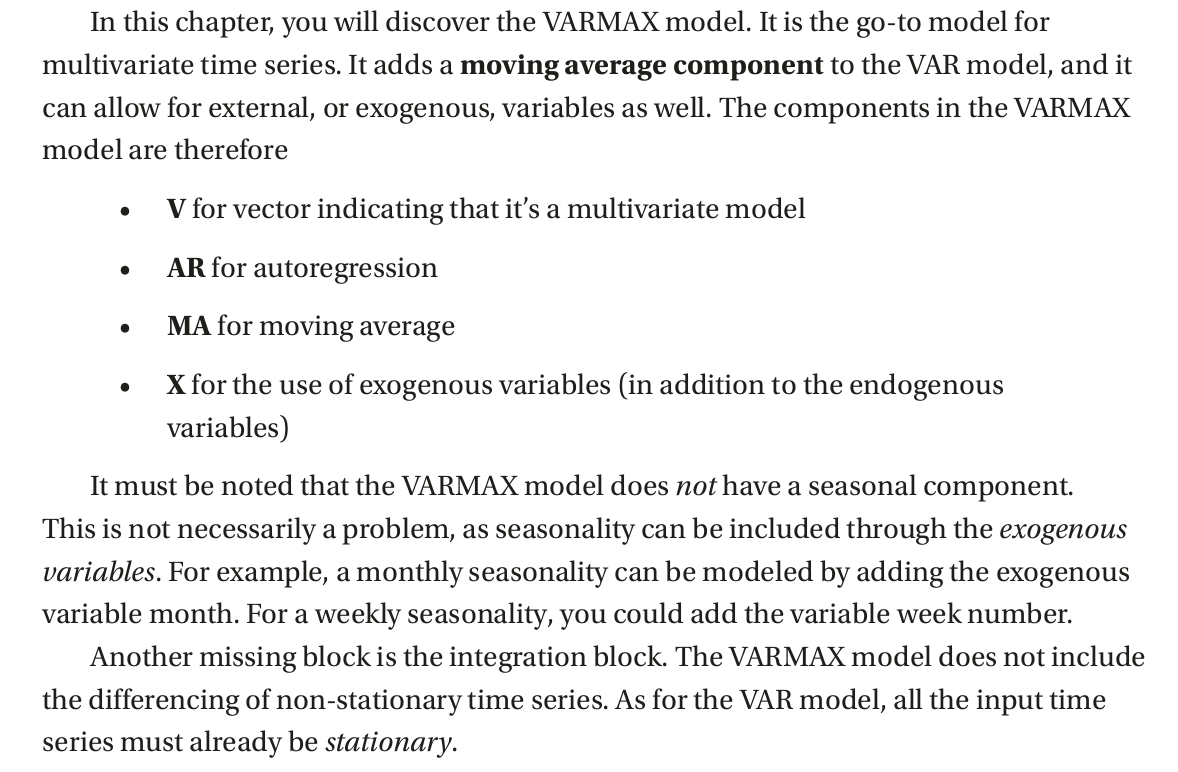

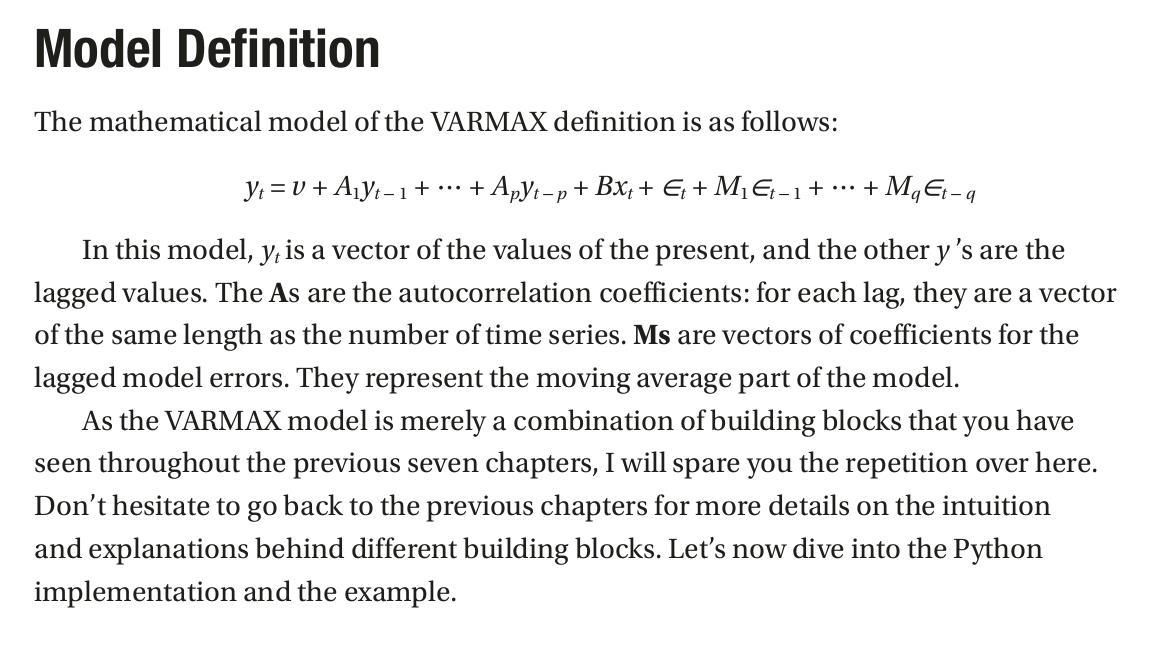

#Multiple Time Series with Exogenous Variables

As a first step, let’s prepare the Walmart data on a by-store and by-week basis. As you have seen in the previous chapter, this dataset lends itself perfectly to multivariate time series modeling.

## Listing 10-1. Prepare the Walmart data for the VARMAX model

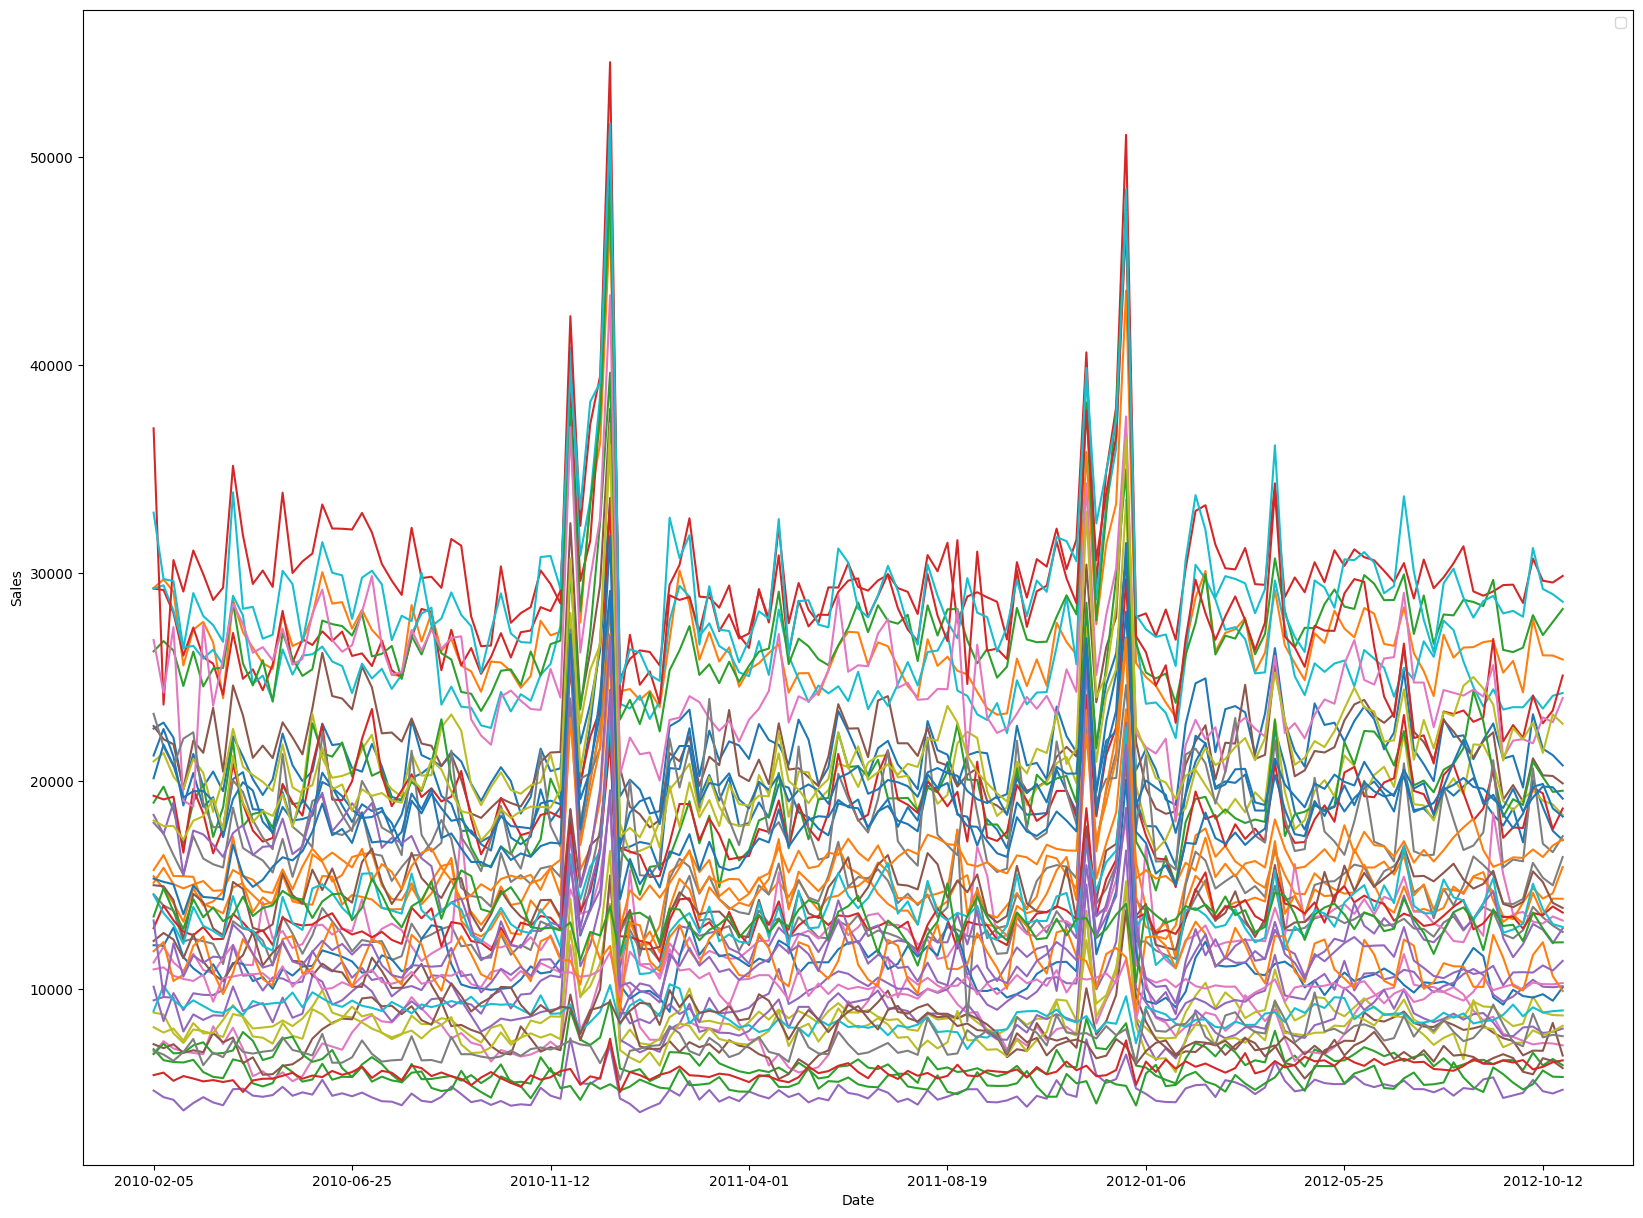

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/kboroz/TimeSeriesPredictionWS2023/main/train.csv'
data = pd.read_csv(url)


exog = data.groupby('Date')['IsHoliday'].sum() > 0
exog = exog.apply(lambda x: float(x))

data = data.pivot_table(index = 'Date', columns = 'Store', values = 'Weekly_Sales')

ax = data.plot(figsize=(20,15))
ax.legend([])
ax.set_ylabel('Sales')
plt.show()


Note that in Listing 10-1, the exogenous data have been created as well. They are the indicator of the presence of holidays per week. They will be the only variable used as exogenous data in this example, but there is no theoretical restriction to use more exogenous variables.

From the plot obtained by this code ou can observe that the time
series follow patterns that seem relatively correlated.

In the previous sessions,we estimated the VAR, using only the order p.

This p determines the order of the AR component.

In the VARMAX model, there are both an AR component and an MA component.

Therefore, there is an order for the AR part and for the MA part to be decided.

The hyperparameters of VARMAX(p,q) are

  -The order of the AR component, denoted p
  -The order of the MA component, denoted q

Now to estimate a VARMAX model, you may use the code shown in Listing 10-2. To
avoid the model taking too much computation resources on your hardware, the code
example uses the first three stores of the dataset.

## Listing 10-2. Running the VARMAX(1,1) model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-pac

0.9625447362150201


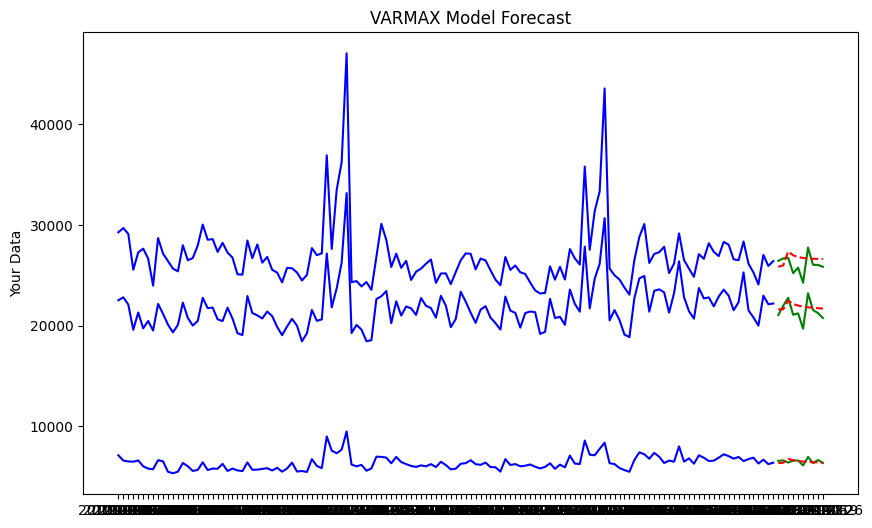

In [13]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

train = data.iloc[:-10,[0,1,2]]
test = data.iloc[-10:,[0,1,2]]

train_exog = exog[:-10]
test_exog = exog[-10:]

mod = sm.tsa.VARMAX(train, order=(1,1), exog=train_exog)
res = mod.fit(maxiter=100, disp=False)

fcst = res.forecast(exog=test_exog.values, steps=10)
mape = mean_absolute_percentage_error(test, fcst)
model_accuracy = 1 - mape
print(model_accuracy)


plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Train', color='blue')
plt.plot(test.index, test.values, label='Test', color='green')
plt.plot(test.index, fcst, label='Forecast', color='red', linestyle='dashed')

plt.title('VARMAX Model Forecast')
plt.xlabel('Time')
plt.ylabel('Your Data')
#plt.legend()
plt.show()

The VARMAX model, especially when applied to examples with a large number of
variables, can be very long to run.

What’s taking long here is the estimation of the moving average part of the model. MA models are known to be exceptionally slow to fit, and in
the current case, there is the difficulty of having 45 variables to estimate it for.

The R2 that was obtained on this example was 0.96. This is a great score. This was obtained on a ten-step forecast. As you may remember, the moving
average component is not suited for multistep forecasts.

With a model training time that is so long already, it would hardly be a solution to add repetitive retraining procedures to the model. The VARMAX model should be used only in cases where training times are not a problem or where the VARMAX obtains performances that cannot be obtained using alternative training methods.

It is great to have the more advanced modeling technique of VARMAX in your
forecasting toolbox. The model can fit more complex processes than many other time series models.

**Yet it also has its disadvantages:**

training times are relatively long compared to simpler models, and it needs a relatively large amount of data to estimate correctly.

As a sidenote, you will find that those training time and data availability
requirements are almost unavoidable for any of the more complex time series and
machine learning techniques. This can partly be countered by computing power, but it is still important to evaluate model choice critically.

In [5]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

train = data.iloc[:-10, [0, 1, 2]]
test = data.iloc[-10:, [0, 1, 2]]

train_exog = exog[:-10]
test_exog = exog[-10:]

mod = sm.tsa.VARMAX(train, order=(1, 1), exog=train_exog)
res = mod.fit(maxiter=100, disp=False)

fcst = res.forecast(exog=test_exog.values, steps=10)

# Calculate R2 score
r2 = r2_score(test, fcst)
print("R2 Score:", r2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


R2 Score: -0.4585065627992624


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
